# ***MACHINE LEARNING***

## *ÍNDICE:* 
---
0. INTRODUCCIÓN
1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
    - 1.1. Acondicionamiento bases de datos
    - 1.2. Análisis visual
    - 1.3. Análisis estadístico  
2. **MACHINE LEARNING**
    - [2.1. Preparación y limpieza de datos](#21)
    - [2.2. Feature Engineering](#22)
    - [2.3. Modelado](#23)
3. RESULTADOS
    - 3.1. Visualización y reporting de los resultados
    - 3.2. Creación de un pipeline para el flujo automatizado
---

##  **2.1. Preparación y limpieza de datos**<a id='21'></a>

In [1]:
# Librerias
from utils.libreries import *

%matplotlib inline 

In [2]:
# Definicion variables y constantes
PREROOT = os.getcwd()

target = 'Churn'

In [4]:
# Carga de datos
df=pd.read_csv(PREROOT+'/data/raw/client_dataset.csv',sep=';')
df.head()

,idClient,Score,CountryLocation,Gender,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idClient          10000 non-null  int64  
 1   Score             10000 non-null  int64  
 2   CountryLocation   10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Games Balance     10000 non-null  float64
 7   NumOfProducts     10000 non-null  int64  
 8   HasPremiumAccess  10000 non-null  int64  
 9   IsActiveMember    10000 non-null  int64  
 10  Cumulative score  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


#### División de la data:

In [5]:
dataset_to_train_test(df,0.2,random_state=77,path_train='data/raw/training_set.csv',path_test='data/raw/testing_set.csv') 

Los conjuntos de entrenamiento y prueba se han guardado exitosamente.


In [6]:
training_set = pd.read_csv(PREROOT+'/data/raw/training_set.csv',sep=',')
training_set.head()

,idClient,Score,CountryLocation,Gender,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn
0,919,784,Spain,Male,35,3,0.00,2,0,0,81483.64,0
1,6810,684,France,Female,26,5,87098.91,1,0,0,106095.82,0
2,6235,540,France,Male,37,6,0.00,2,1,0,141998.89,0
3,218,730,Spain,Female,33,9,0.00,2,0,0,176576.62,0
4,5020,823,Germany,Female,53,4,124954.94,1,0,1,131259.60,1


##### Subdivisión train y validation 

In [7]:
dataset_to_train_test(training_set,0.2,random_state=77,path_train='data/raw/training_set/df_train.csv',path_test='data/raw/training_set/df_validation.csv')

Los conjuntos de entrenamiento y prueba se han guardado exitosamente.


> `NOTA:` todo lo que se haga al df_train se le realizará al df_validation y así simularía la nueva data, que se comprobará con testing_set

##  **2.2. Feature Engineering**<a id='22'></a>

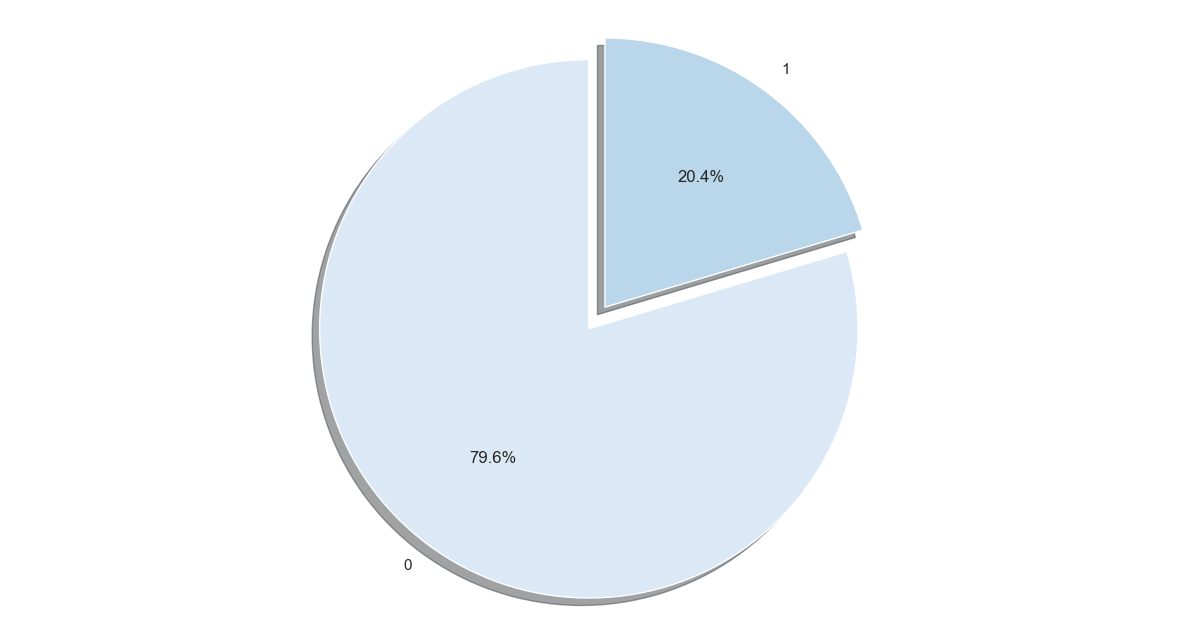

In [8]:
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = df[target].value_counts().index
sizes = df[target].value_counts()
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%', # type: ignore
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

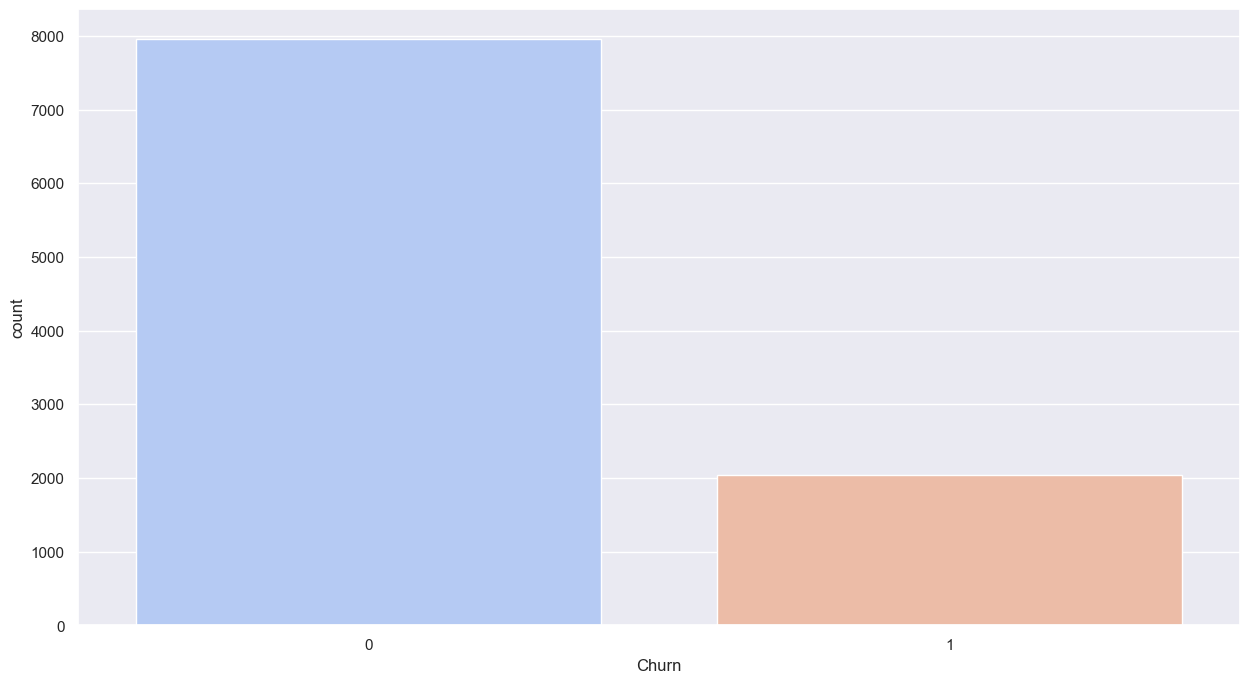

In [9]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.countplot(x=target,data=df,palette="coolwarm")

**Observaciones:**

- Dataset desbalanceado

**Propuestas:**

Al tener un dataset desbalanceado se buscan una serie de opciones, en este caso, suponiendo que no se puedan obtener más datos que equilibren nuestro dataset se plantean las siguientes opciones.
- Opciones para *balancear la data*:

    - Oversampling.
    - Undersampling.
    - Métodos mixtos.

Se puede apreciar visualmente a continuación: 

<img src="https://miro.medium.com/max/1400/1*o_KfyMzF7LITK2DlYm_wHw.png" alt="drawing" width="450x500"/>
<img src="https://miro.medium.com/max/1400/1*gHW_PLz7kWrhdl5t1sJRRA.png" alt="drawing" width="450x500"/>
  

##  **2.3. Modelado**<a id='23'></a>

In [6]:
# Carga de datos
df_train = pd.read_csv(PREROOT+'/data/raw/training_set/df_train.csv')
df_validation = pd.read_csv(PREROOT+'/data/raw/training_set/df_validation.csv')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idClient          6400 non-null   int64  
 1   Score             6400 non-null   int64  
 2   CountryLocation   6400 non-null   object 
 3   Gender            6400 non-null   object 
 4   Age               6400 non-null   int64  
 5   Tenure            6400 non-null   int64  
 6   Games Balance     6400 non-null   float64
 7   NumOfProducts     6400 non-null   int64  
 8   HasPremiumAccess  6400 non-null   int64  
 9   IsActiveMember    6400 non-null   int64  
 10  Cumulative score  6400 non-null   float64
 11  Churn             6400 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 600.1+ KB


In [8]:
df_train.shape

(6400, 12)

In [9]:
df_validation.shape

(1600, 12)

## Baseline:

Con este apartado se pretende hacer una `prueba de contacto` con los modelos ***sin tratar los datos apenas***, ***sin buscar los hiperparámetros que mejor ajusten*** y ***sin balancear el dataset***. Simplemente para tener una noción del punto de partida y las diferencias sustanciales de cada modelo, aunque esto pueda cambiar con las modificaciones que se desarrollan posteriormente.

In [10]:
# Elección del / los modelos
modelos = choose_models('all', None, clf = True)

In [11]:
modelos

{'LogReg': LogisticRegression(),
 'KNNC': KNeighborsClassifier(),
 'DTC': DecisionTreeClassifier(),
 'RFC': RandomForestClassifier(),
 'BagC': BaggingClassifier(),
 'AdaBC': AdaBoostClassifier(),
 'GBC': GradientBoostingClassifier(),
 'SVC': SVC(),
 'XGBC': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, rand

In [12]:
# Creación de dataframe transformando columnas object a categoricas mediante encoder
encoder = LabelEncoder()
df_train_encoded = label_encode_columns(df_train,encoder=encoder) 

In [13]:
X_train = df_train_encoded.drop(columns=[target,'idClient'])
y_train = df_train_encoded[target]

In [14]:
X_train.columns

Index(['Score', 'CountryLocation', 'Gender', 'Age', 'Tenure', 'Games Balance',
       'NumOfProducts', 'HasPremiumAccess', 'IsActiveMember',
       'Cumulative score'],
      dtype='object')

In [15]:
X_val = df_validation.drop(columns = [target,'idClient'])
y_val = df_validation[target]
X_val = label_encode_columns(X_val,encoder = encoder) 

<class 'list'>
Saved
--------------------
LogisticRegression()
--------------------



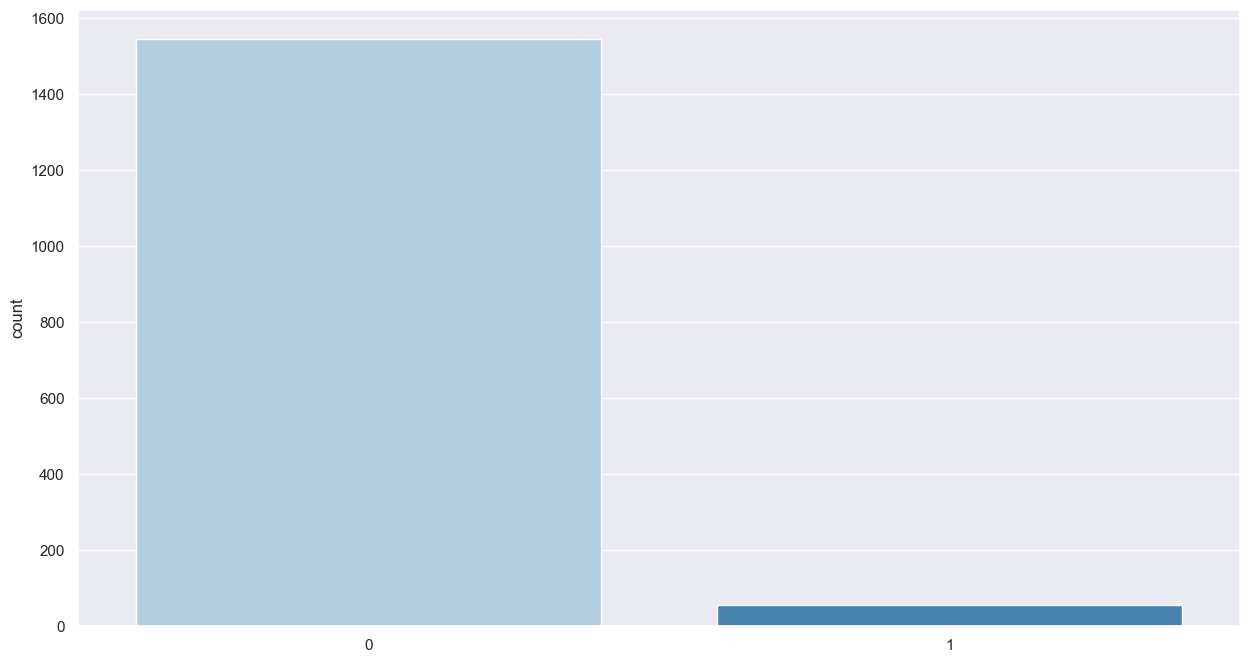

Saved
--------------------
KNeighborsClassifier()
--------------------



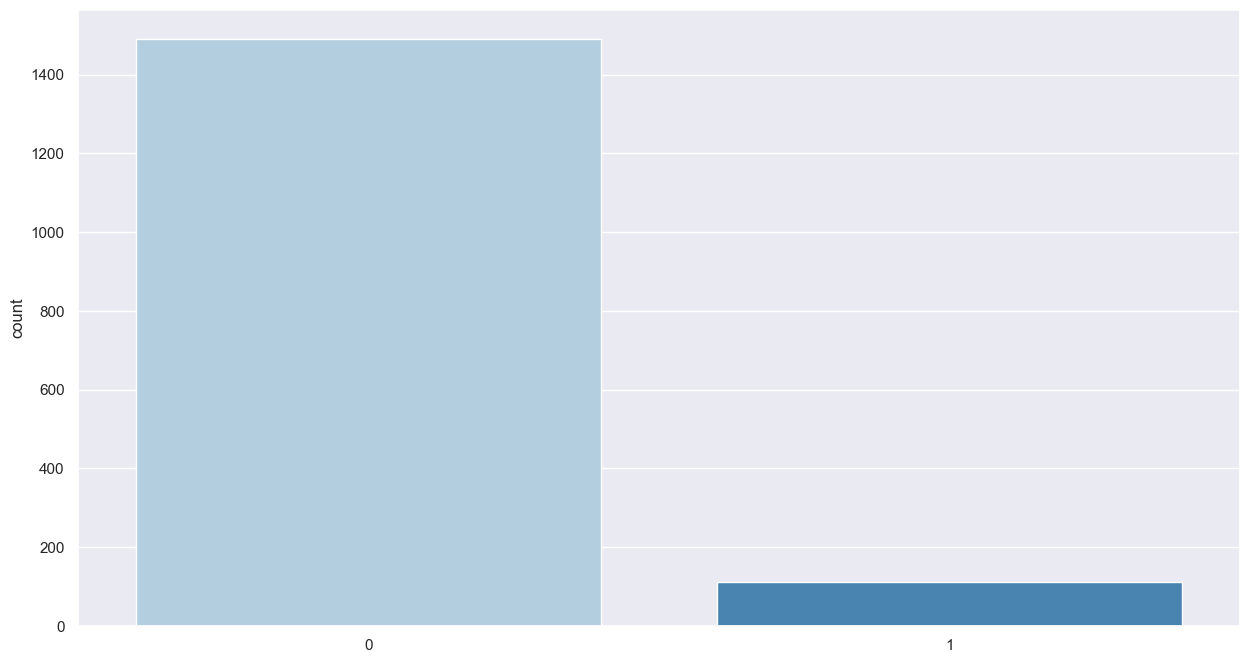

Saved
--------------------
DecisionTreeClassifier()
--------------------



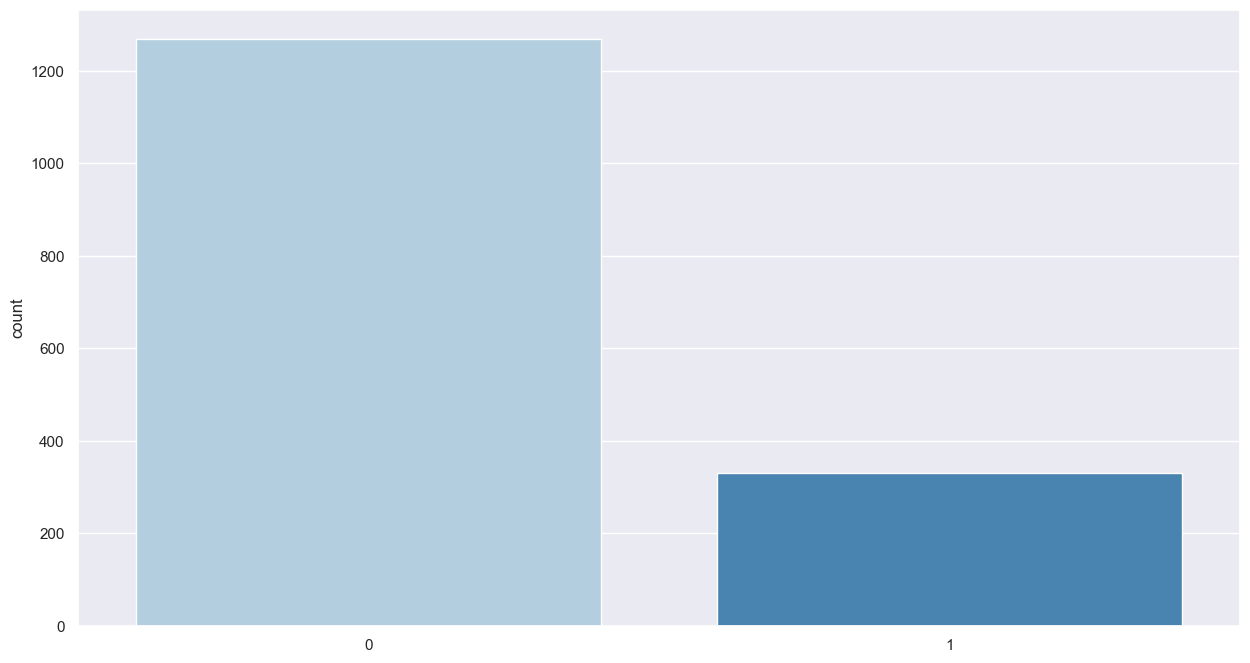

Saved
--------------------
RandomForestClassifier()
--------------------



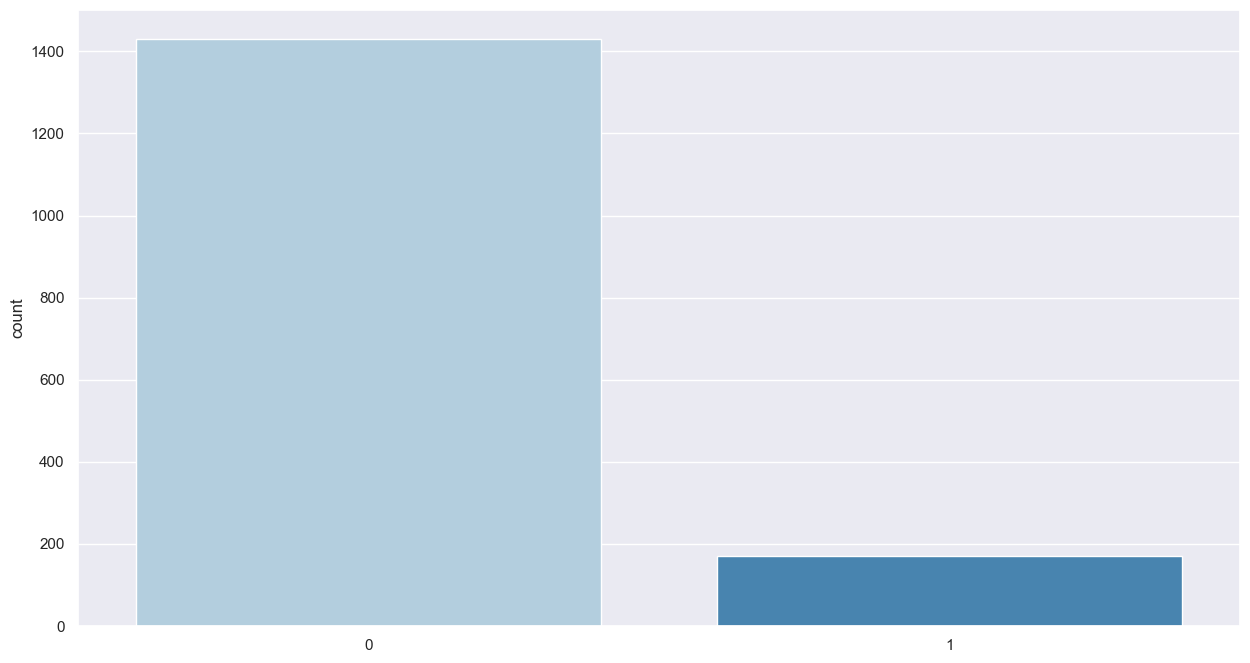

Saved
--------------------
BaggingClassifier()
--------------------



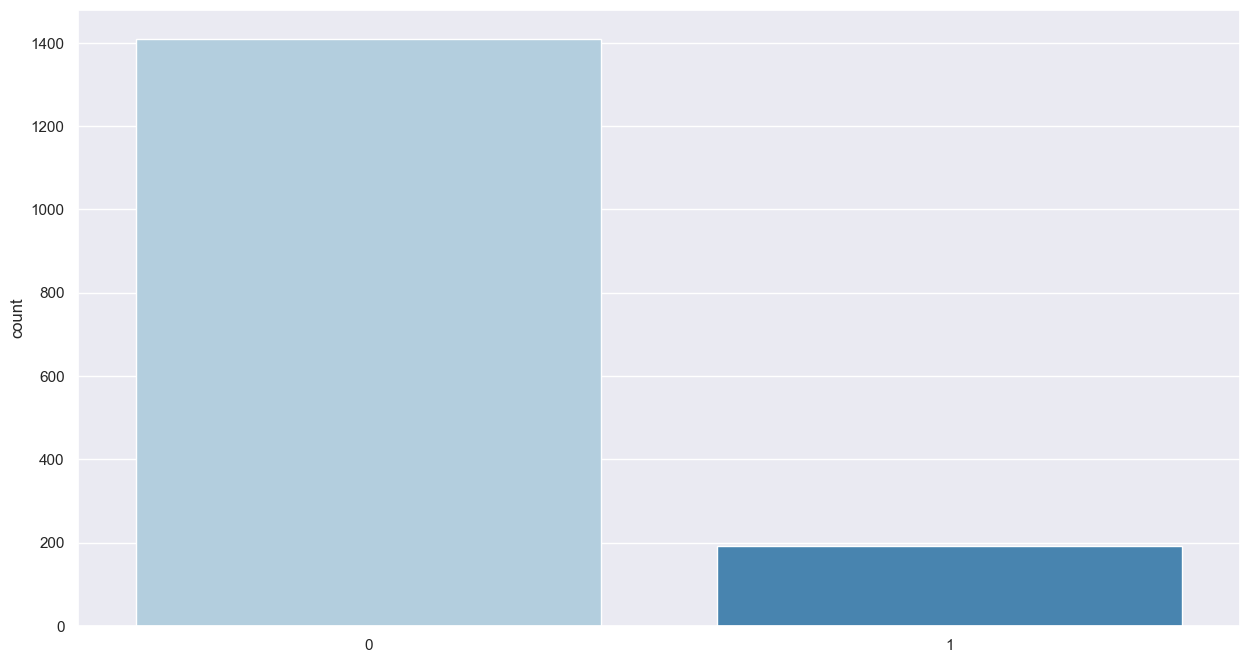

Saved
--------------------
AdaBoostClassifier()
--------------------



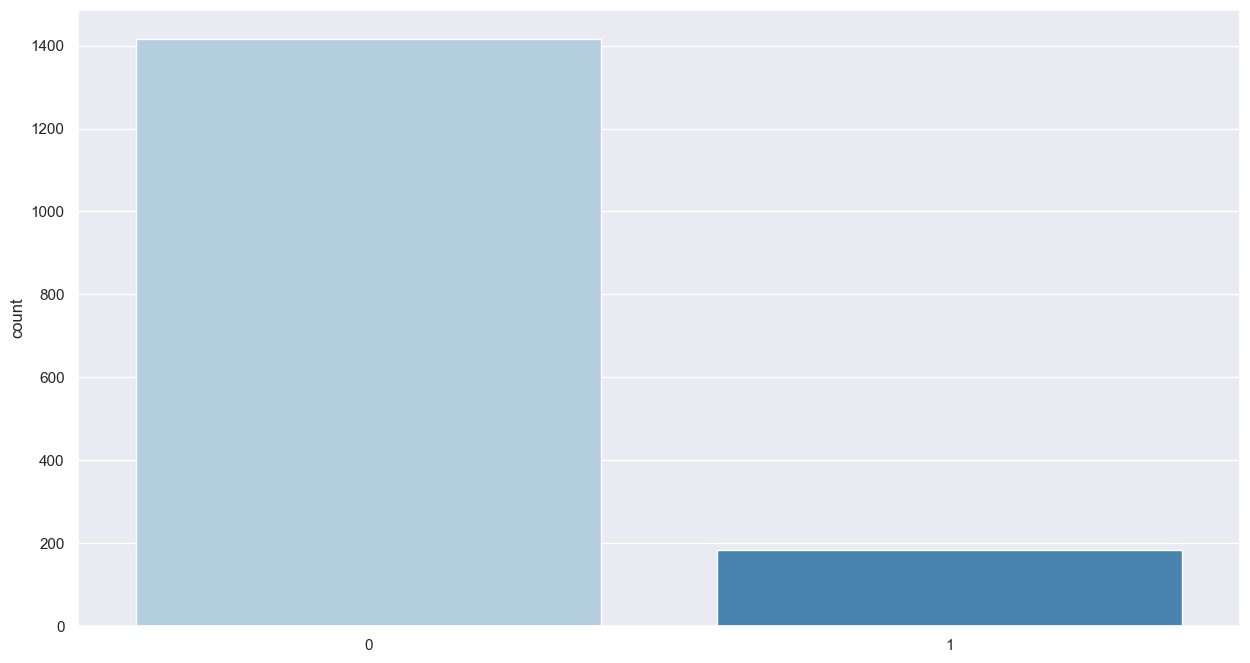

Saved
--------------------
GradientBoostingClassifier()
--------------------



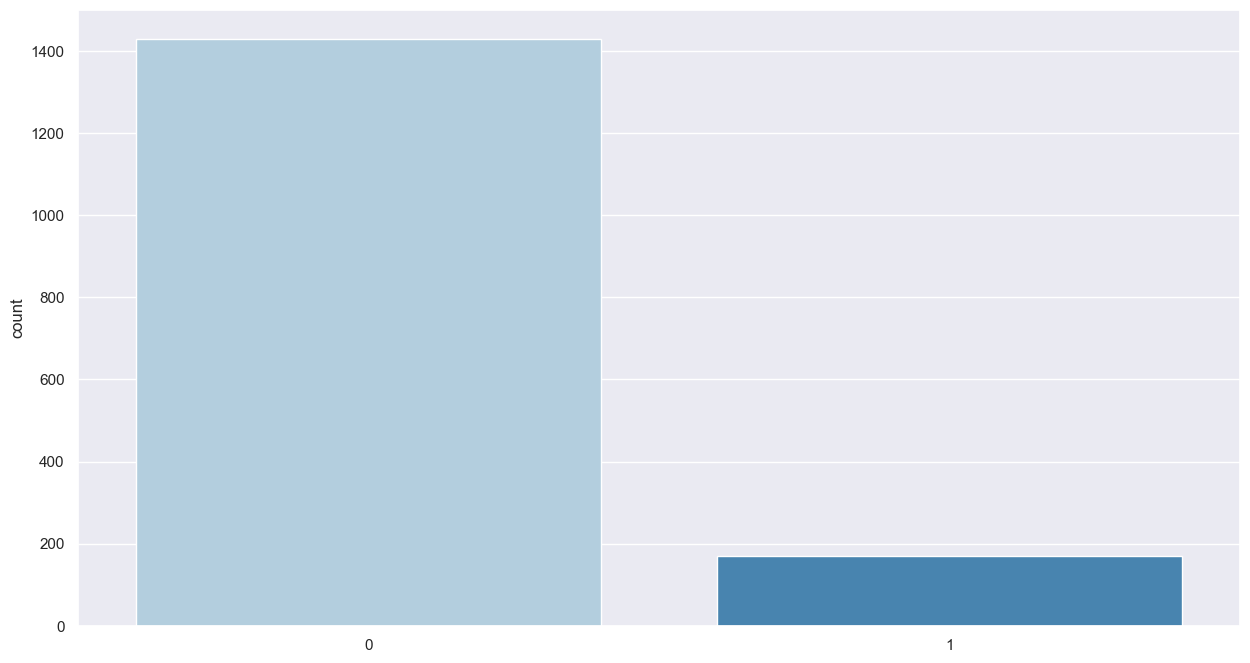

Saved
--------------------
SVC()
--------------------



/Users/mcgg/opt/miniconda3/envs/the_bridge_ta/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


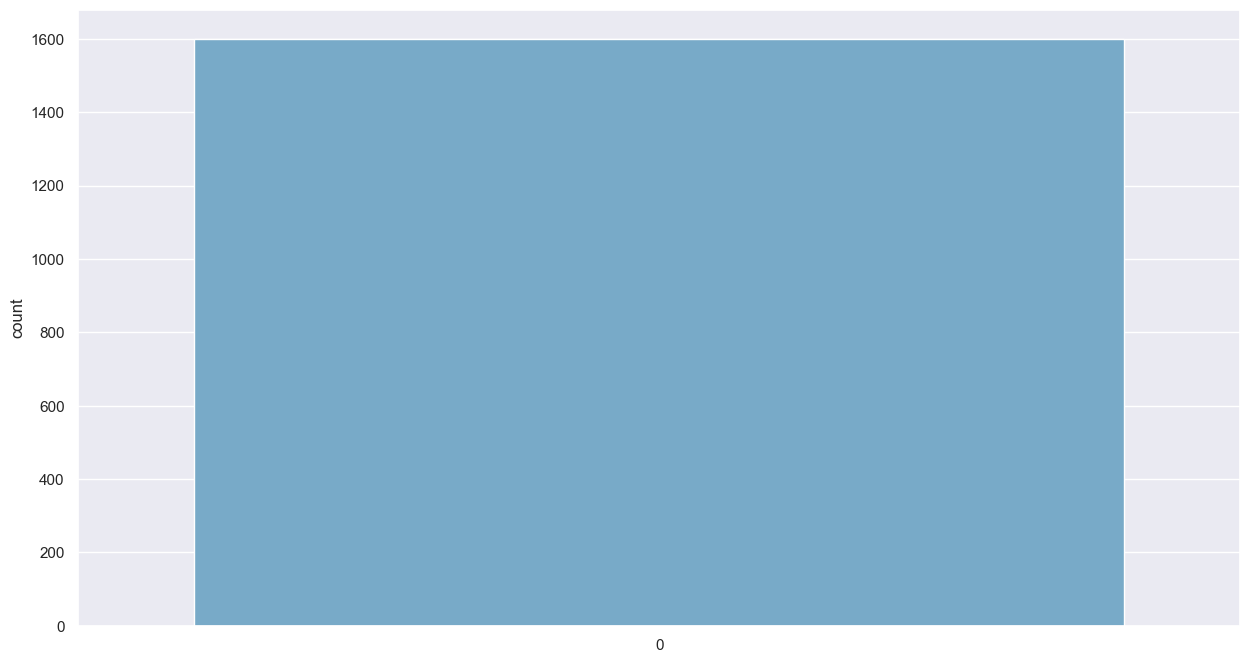

Saved
--------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
--------------------



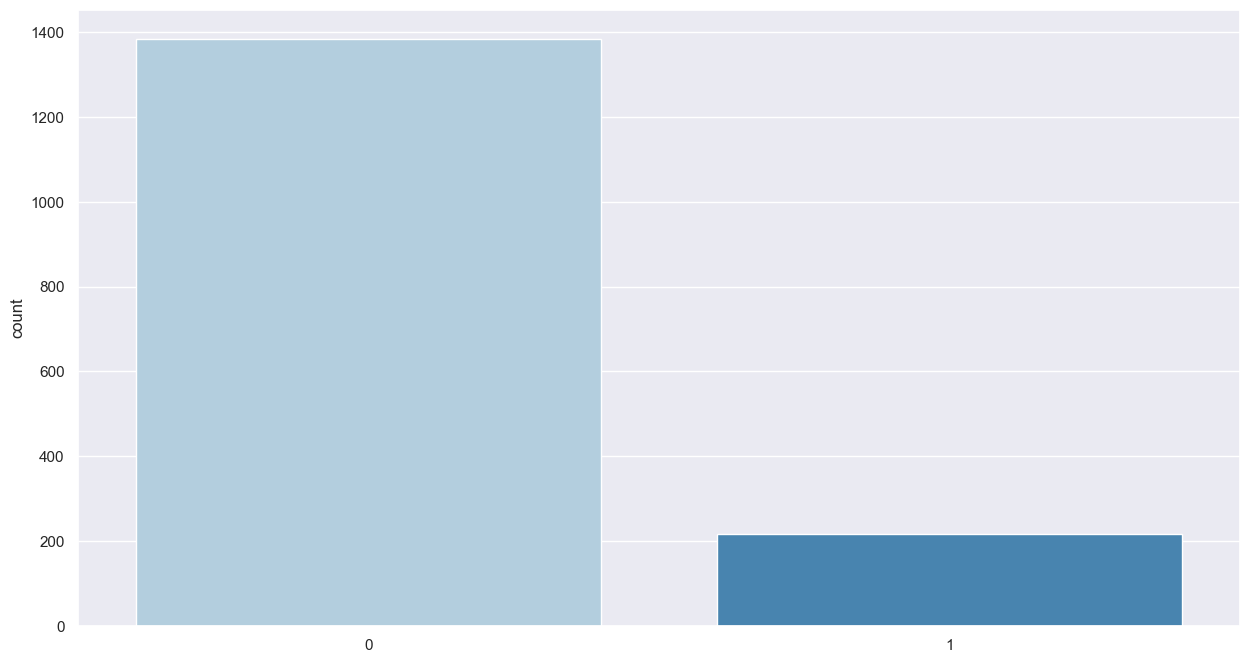

Saved
--------------------
VotingClassifier(estimators=[('RFC', RandomForestClassifier())])
--------------------



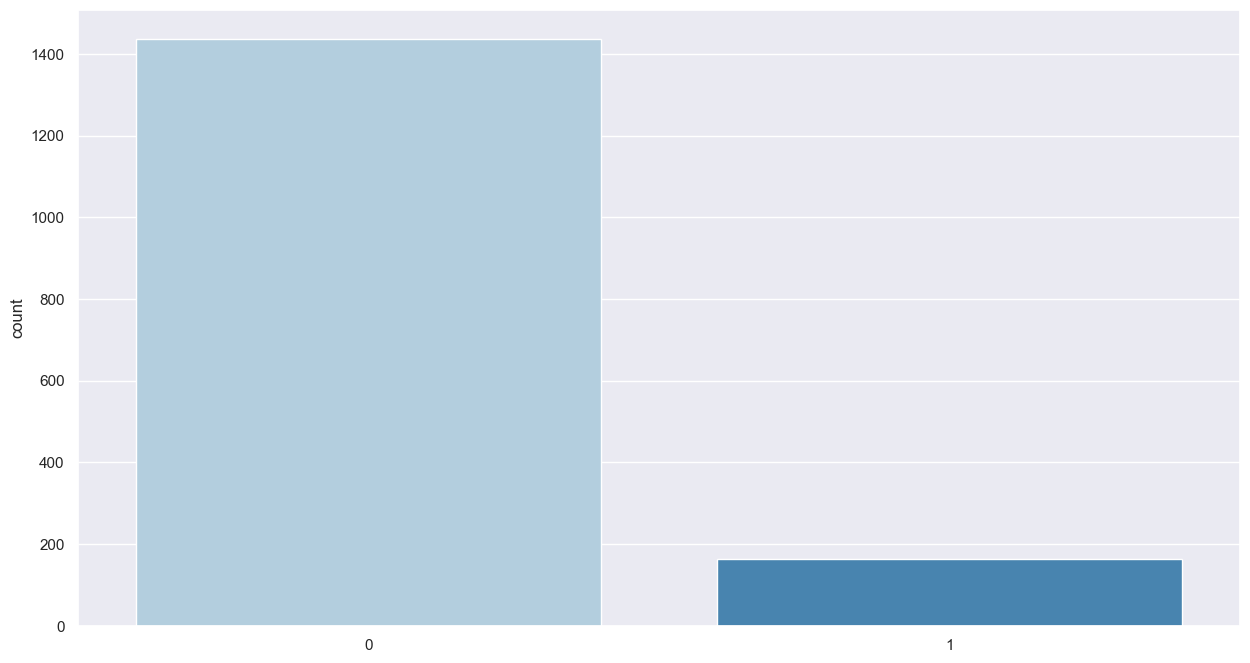

Saved
--------------------
LinearDiscriminantAnalysis()
--------------------



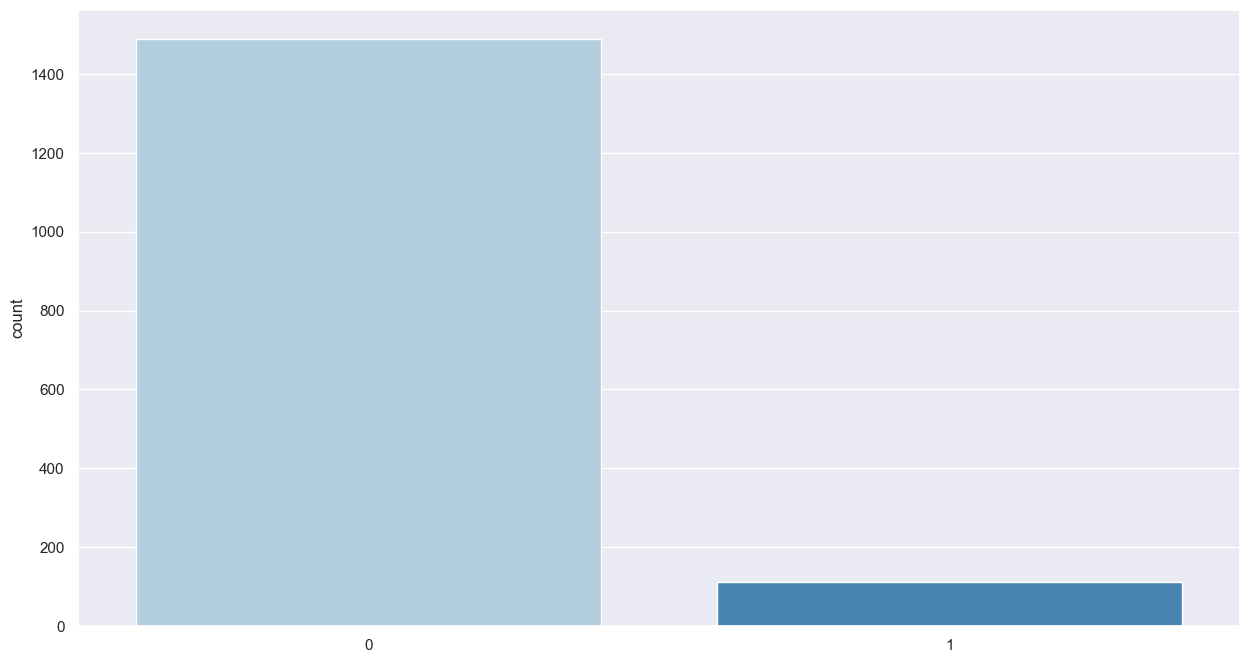

In [22]:
# Baseline con todos los modelos seleccionados
modelos = choose_models('all',None,clf = True)

for modelo in list(modelos.keys()):
    y_pred,metricas,_ = baseline(X_train,y_train,X_val,y_val, base_model = modelos[modelo], clf = True,file_name='baseline_metrics.csv')
    
    print(20*'-'+'\n'+f'{str(modelos[modelo])}'+'\n'+20*'-'+'\n')
    
    sns.countplot(x=y_pred,palette='Blues');
    plt.show()

<module 'matplotlib.pyplot' from '/Users/mcgg/opt/miniconda3/envs/the_bridge_ta/lib/python3.10/site-packages/matplotlib/pyplot.py'>

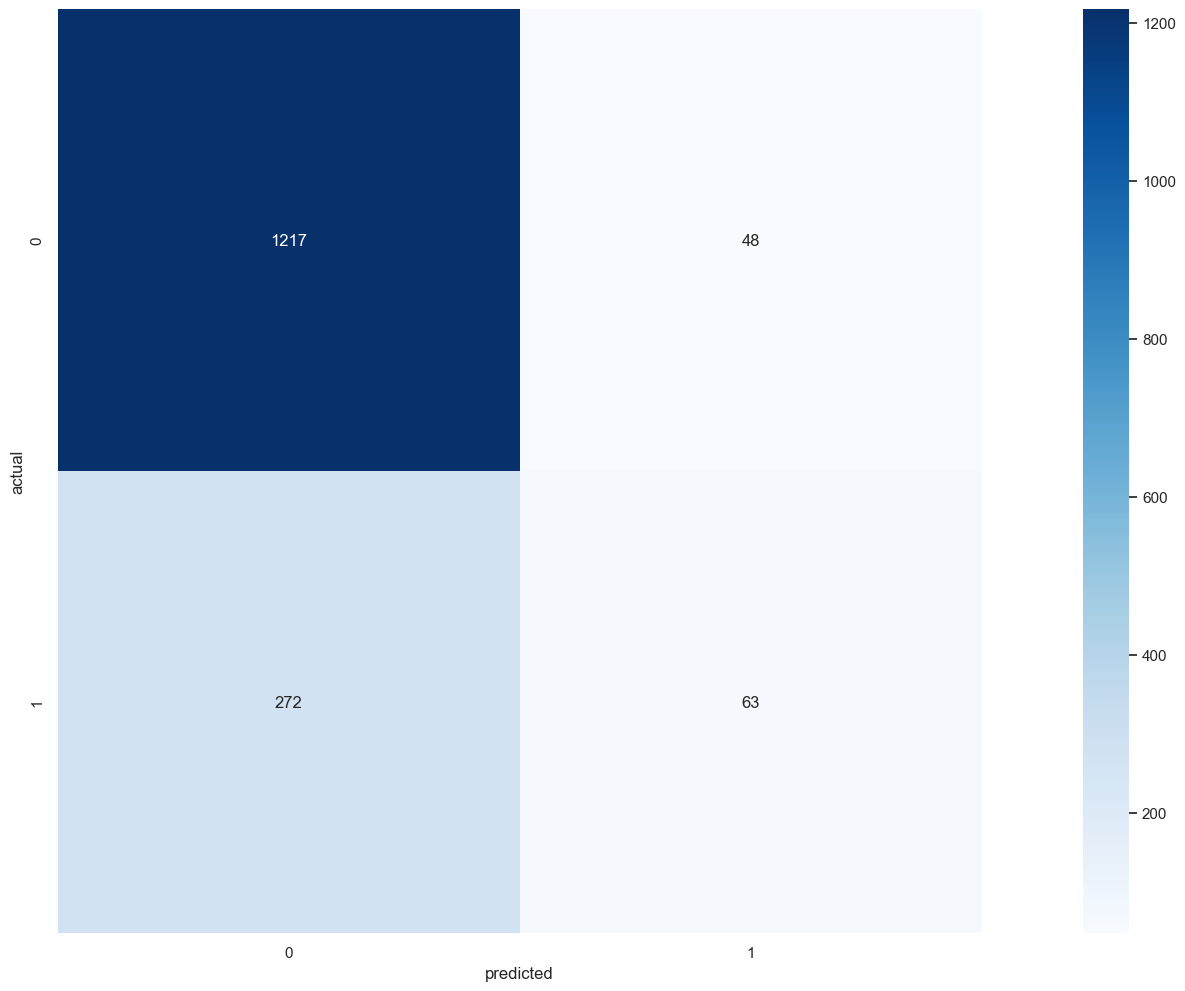

In [23]:
# Confusion matrix 
plt.figure(figsize= [26, 12])
matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

**¿Qué métrica priorizar?** 

> Se pretende reducir los falsos negativos por lo tanto la métrica a priorizar sería el **recall** (exhaustividad o sensibilidad).

*NOTA*: sin embargo, se debe recalcar que si se busca maximizar el recall se corre el riesgo de aumentar los falsos positivos. En función de la aplicación se plantearía usar otra métrica que los compense como el f1-score.

In [24]:
# Comparación de las métricas
df_baseline_metrics=pd.read_csv(os.getcwd()+'/model/model_metrics/baseline_metrics.csv',sep=';')
df_baseline_metrics.sort_values(by='Recall',ascending = False)

,model,ACC,Precision,Recall,F1,ROC,Jaccard
2,DecisionTreeClassifier,0.793750,0.5075528700906344,0.501493,0.504505,0.686319,0.337349
8,XGBClassifier,0.848125,0.7129629629629629,0.459701,0.558984,0.705345,0.387909
5,AdaBoostClassifier,0.848125,0.75,0.411940,0.531792,0.687788,0.362205
6,GradientBoostingClassifier,0.856250,0.8070175438596491,0.411940,0.545455,0.692927,0.375000
4,BaggingClassifier,0.842500,0.7172774869109948,0.408955,0.520913,0.683134,0.352185
3,RandomForestClassifier,0.846875,0.7647058823529411,0.388060,0.514851,0.678220,0.346667
9,VotingClassifier,0.849375,0.7865853658536586,0.385075,0.517034,0.678703,0.348649
10,LinearDiscriminantAnalysis,0.800000,0.5675675675675675,0.188060,0.282511,0.575058,0.164491
1,KNeighborsClassifier,0.749375,0.2,0.065672,0.098876,0.498053,0.052009
0,LogisticRegression,0.780000,0.34545454545454546,0.056716,0.097436,0.514129,0.051213


In [25]:
sns.set(rc={'figure.figsize':(15, 8)})
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)
metric = 'Recall'

saved_baseline_metrics = pd.read_csv('model/model_metrics/baseline_metrics.csv',sep=';').sort_values(by=metric,ascending=False)

cv_means = saved_baseline_metrics[metric]
cv_means = cv_means[:-1]
lista = saved_baseline_metrics['model']
lista = lista[:-1]

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means.astype(float),
        "Algorithms": lista
    })



In [26]:
cv_frame

,CrossValMeans,Algorithms
2,0.501493,DecisionTreeClassifier
8,0.459701,XGBClassifier
5,0.411940,AdaBoostClassifier
6,0.411940,GradientBoostingClassifier
4,0.408955,BaggingClassifier
3,0.388060,RandomForestClassifier
9,0.385075,VotingClassifier
10,0.188060,LinearDiscriminantAnalysis
1,0.065672,KNeighborsClassifier
0,0.056716,LogisticRegression


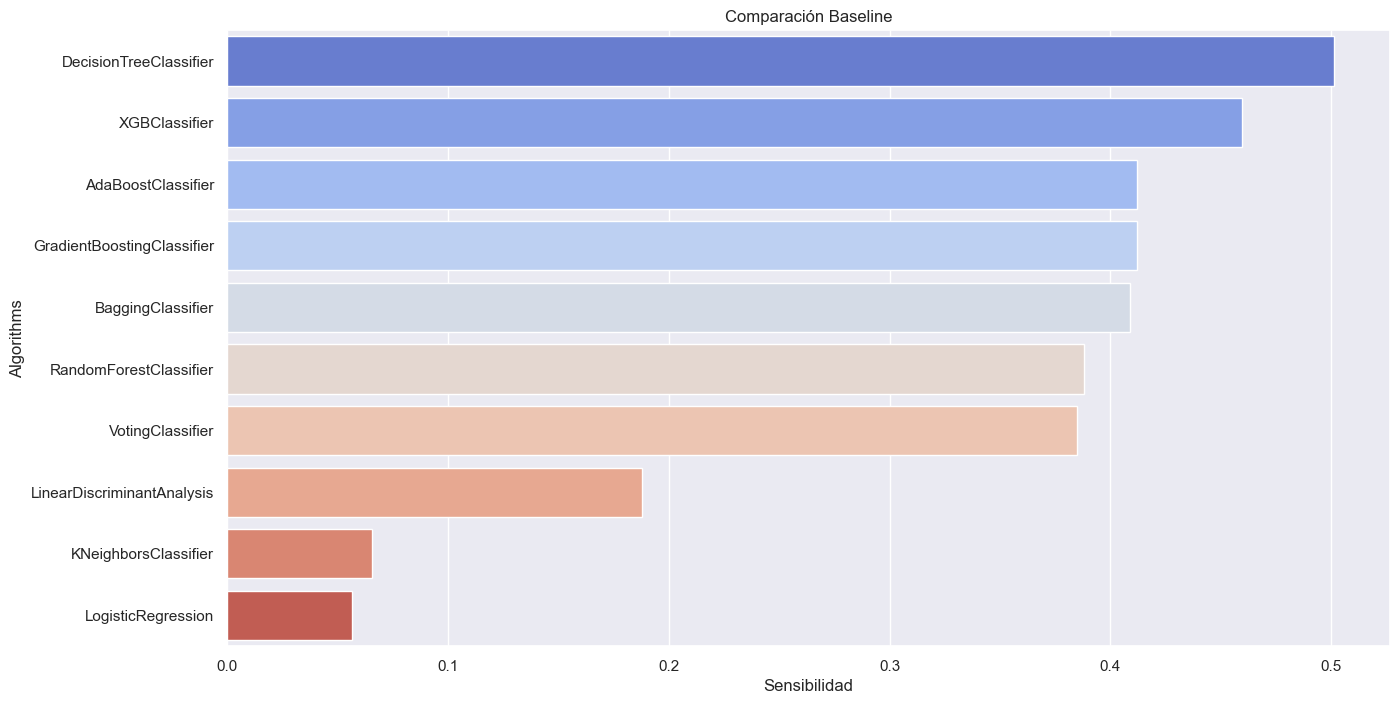

In [27]:
cv_plot = sns.barplot(x="CrossValMeans",y="Algorithms", data = cv_frame,palette='coolwarm')
cv_plot.set_xlabel("Sensibilidad")
cv_plot = cv_plot.set_title("Comparación Baseline")

**Observaciones:**

- La métrica accuracy es bastante buena en todos los modelos probados, pero se observan mayores discrepancias en el resto de métricas evaluadas. 

- Los modelos más compensados y con mejores métricas son los cuatro primeros: 

    
    * DesisionTreeClassifier
    * XGBoostClassifier
    * GradientBoostingClassifier
    * AdaBoostClassifier

**Propuestas:**

Al tener un dataset cuyo objetivo es detectar todos los clientes que tengan riesgo de abandonar, se debe buscar una métrica que tenga mucho peso la sensibilidad. Entonces el impacto de los falsos positivos (aquellos que se predice como posible abandono y realmente no ocurre) es menos perjudicial que los falsos negativos (aquellos que se predicen como personas fidelizadas y que realmente abandonen). 

- Opciones de *métricas de evaluación* del modelo de clasificación:

    - Accuracy.
    - Precision.
    - **Recall**.
    - F1.
    - Jaccard.

Se puede apreciar visualmente a continuación la diferencia entre las tres primeras métricas: 

<img src="img/metrics.png" alt="drawing" width="600x400"/>

El ***objetivo*** según nuestro dataset es detectar aquellos clientes con riesgo de abandonar.


## Ajuste de hiperparámetros:

Con este apartado se pretende `mejorar estimadores` realizando el ***ajuste de hiperparámetros***.  

Estos estimadores se obtienen de introducir todas las variables y sin haberle realizado modificaciones significativas a sus datos: ***falta tratar los datos*** y ***balancear el dataset***. 

En algunos casos se puede observar que mejora el estimador significativamente con respecto a la prueba anterior sin modificar sus hiperparámetros.

In [60]:
K_fold = StratifiedKFold(n_splits=10)

##### Generar varios modelos mediante for

In [ ]:
models_names = list(choose_models('all',params=None).keys())
mods = models_names[2:4]

for mod in mods:    
    models_generator(X_train, y_train, X_val, y_val,model = choose_models(mod,params=None),params = choose_params(mod),
    file_name='metrics.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
    scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score),'Recall': make_scorer(recall_score)})

##### Generar un sólo modelo

In [ ]:
models_names = list(choose_models('all',params=None).keys())
mods = models_names[9]


models_generator(df,'is_safe',choose_models(mods,params=None),choose_params(mods),
file_name ='metrics.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score),'Precision': make_scorer(precision_score)})

In [62]:
# Comparación de metricas de los modelos entrenados modificando hiperparámetros
hyperparams_metrics = pd.read_csv('model/model_metrics/metrics.csv',sep=';').sort_values(by='Recall',ascending=False)
hyperparams_metrics

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
0,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'ent...",0.690000,0.369106,0.677612,0.477895,0.685446,0.313970,model/DecisionTreeClassifier.pkl
1,RandomForestClassifier,"{'n_estimators': array([ 10, 25, 41, 56, 7...","{'class_weight': 'balanced', 'criterion': 'gin...",0.813125,0.544118,0.662687,0.597577,0.757825,0.426104,model/RandomForestClassifier.pkl


##### Learning curve

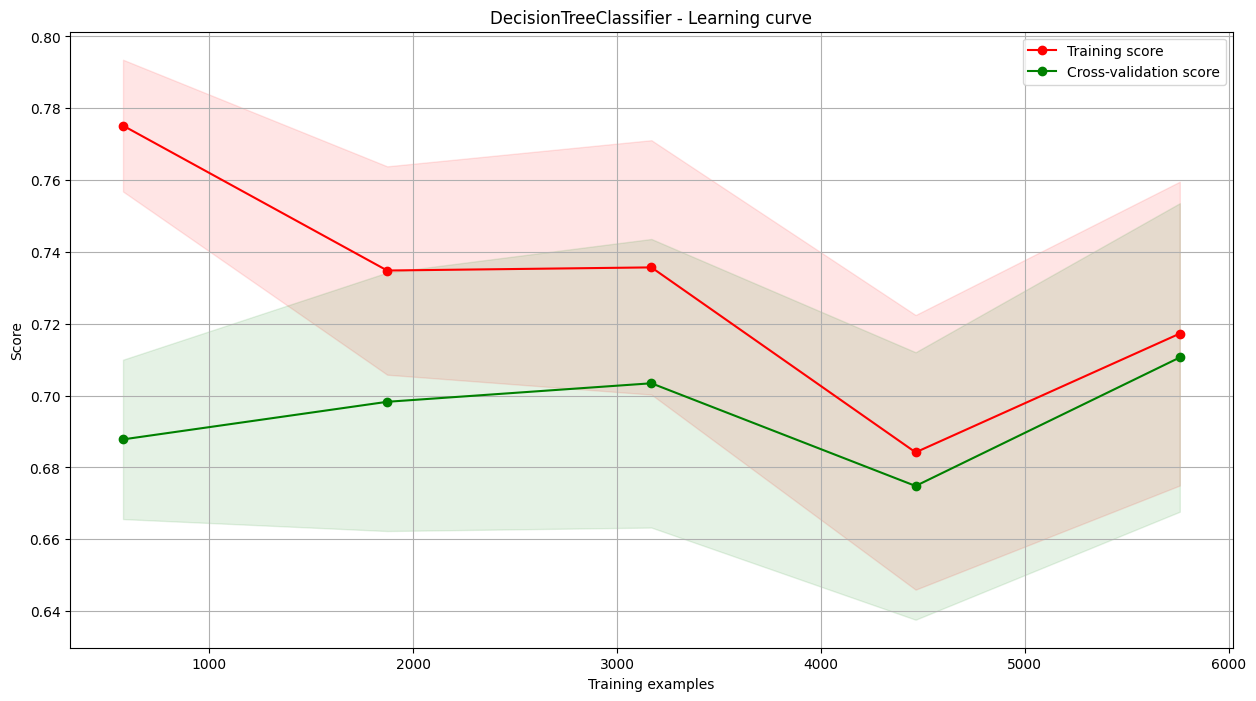

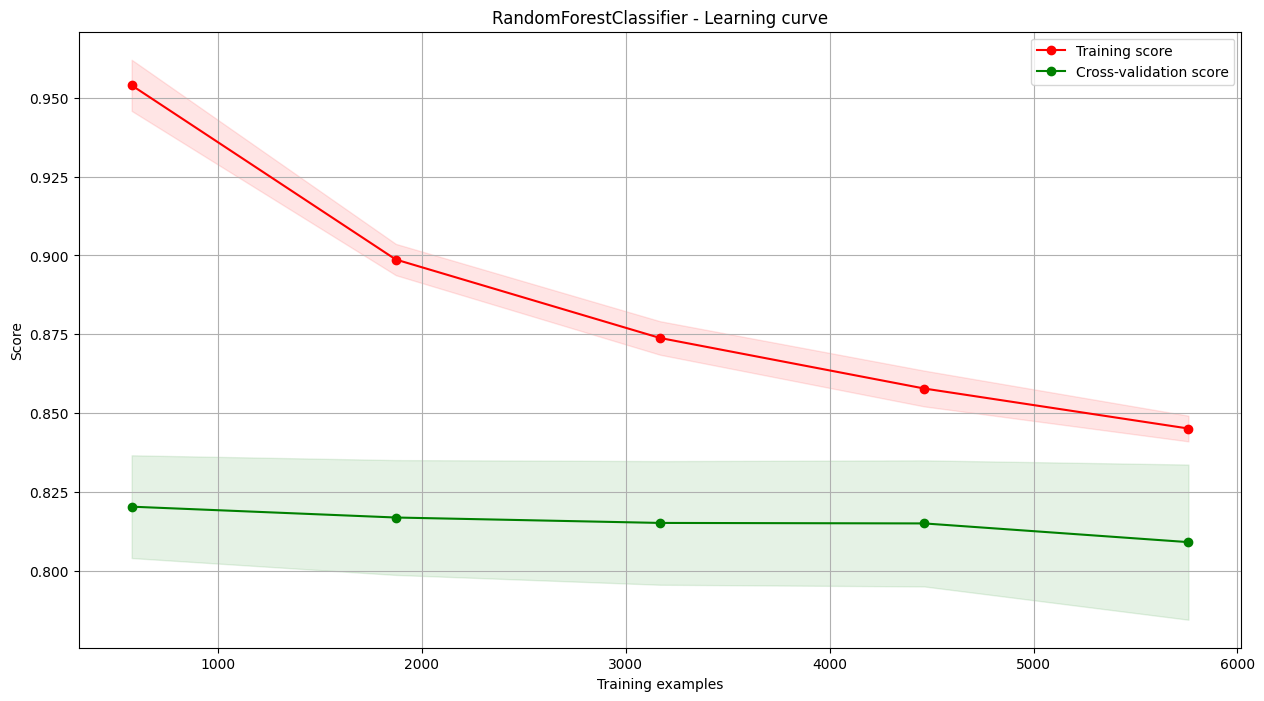

In [67]:
for i in range(len(hyperparams_metrics)):
    pkl_file = open(os.getcwd()+'/'+hyperparams_metrics['model_path'][i],'rb')
    model_pkl=pickle.load(pkl_file)    
    plot_learning_curve(estimator = model_pkl,title = f"{hyperparams_metrics['model'][i]} - Learning curve",
                    X = X_train, y = y_train, cv = K_fold)
                   

**Observaciones:**

- Mejora en las métricas, gracias a la modificación de los hiperparámetros. 

**Propuestas:**

- Realizar un **balanceo de los datos**, con el fin de seguir mejorando las métricas y ajustar al máximo el modelo.
- También comprobar si realizando un **tratamiento previo de los datos** se ve mejorado el modelo:
    * Feature selection
    * Feature engineering




<a href='2b_ML_BalancedData.ipynb'>Ver siguiente notebook</a>